In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from six import StringIO 
from sklearn import tree
from IPython.display import Image  
from io import StringIO
import pydotplus

In [17]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv("C:/Users/YASHWANTH/Desktop/Iris.csv", header=None, names=col_names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [19]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols][1:]
y = iris.species[1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


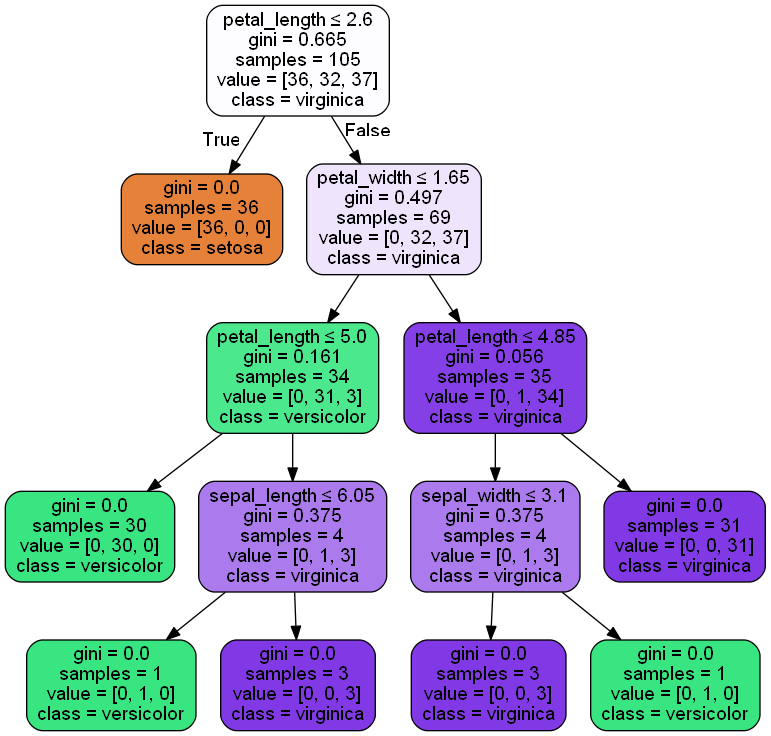

In [21]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['setosa','versicolor','virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())